In [80]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [81]:
img = cv2.imread('Everestgray00.png',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [82]:
hist.shape

(256, 1)

In [83]:
print(hist)

[[  479.]
 [  957.]
 [ 1673.]
 [ 1567.]
 [ 1855.]
 [ 2469.]
 [ 2538.]
 [ 3034.]
 [ 3398.]
 [ 3535.]
 [ 4292.]
 [ 4460.]
 [ 4998.]
 [ 6078.]
 [ 6756.]
 [ 7830.]
 [ 8721.]
 [ 9583.]
 [10381.]
 [10945.]
 [11344.]
 [11489.]
 [11918.]
 [12172.]
 [12627.]
 [13004.]
 [13220.]
 [13297.]
 [13194.]
 [13295.]
 [12950.]
 [12715.]
 [12222.]
 [12245.]
 [11856.]
 [11629.]
 [11366.]
 [11493.]
 [11409.]
 [11553.]
 [11349.]
 [11141.]
 [11050.]
 [11151.]
 [10952.]
 [10873.]
 [11024.]
 [10876.]
 [11136.]
 [11400.]
 [11172.]
 [11583.]
 [11861.]
 [12365.]
 [12658.]
 [12659.]
 [13140.]
 [13527.]
 [13657.]
 [14027.]
 [14325.]
 [14528.]
 [15172.]
 [15373.]
 [15606.]
 [15547.]
 [15870.]
 [16081.]
 [16624.]
 [17203.]
 [18644.]
 [19630.]
 [20349.]
 [21256.]
 [21311.]
 [21091.]
 [21095.]
 [21111.]
 [22220.]
 [23903.]
 [25404.]
 [25564.]
 [25335.]
 [25071.]
 [24809.]
 [25169.]
 [26060.]
 [28076.]
 [30858.]
 [33232.]
 [35013.]
 [34921.]
 [33430.]
 [32781.]
 [32034.]
 [32341.]
 [32230.]
 [30787.]
 [28004.]
 [24605.]


In [84]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [85]:
print(hist)

[  479   957  1673  1567  1855  2469  2538  3034  3398  3535  4292  4460
  4998  6078  6756  7830  8721  9583 10381 10945 11344 11489 11918 12172
 12627 13004 13220 13297 13194 13295 12950 12715 12222 12245 11856 11629
 11366 11493 11409 11553 11349 11141 11050 11151 10952 10873 11024 10876
 11136 11400 11172 11583 11861 12365 12658 12659 13140 13527 13657 14027
 14325 14528 15172 15373 15606 15547 15870 16081 16624 17203 18644 19630
 20349 21256 21311 21091 21095 21111 22220 23903 25404 25564 25335 25071
 24809 25169 26060 28076 30858 33232 35013 34921 33430 32781 32034 32341
 32230 30787 28004 24605 22100 20147 18955 18129 17432 16564 16121 16032
 16015 16997 17181 17129 16485 16301 16234 16230 15640 14562 13027 11399
 10509  9877  9099  8525  7854  7103  6359  5739  5225  4924  4781  4475
  4347  4035  4077  3914  3919  3823  3768  3936  3887  4020  3935  3877
  3602  3507  3297  3106  2998  2826  2837  2796  2724  2727  2578  2588
  2642  2671  2568  2556  2572  2614  2575  2652  2

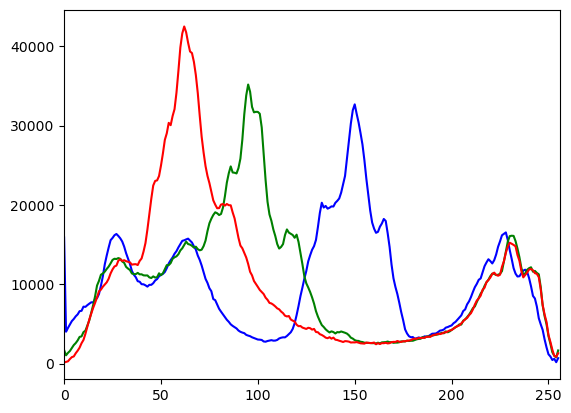

In [86]:
img = cv2.imread('Everestgray00.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

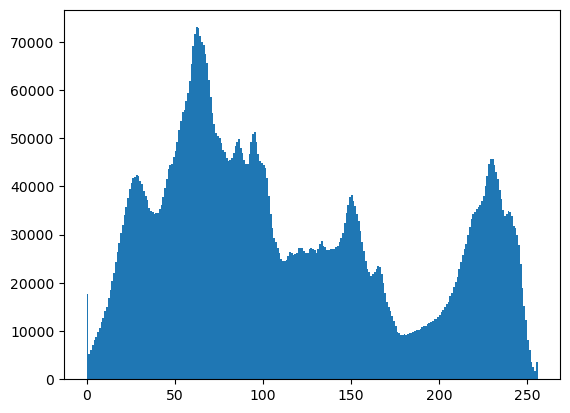

In [87]:
plt.hist(img.ravel(),256,[0,256]); plt.show()


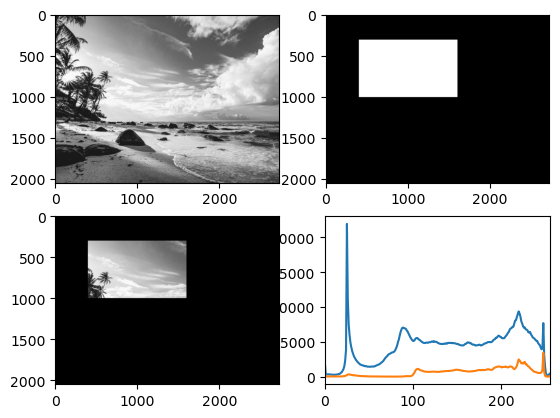

In [88]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:1000, 400:1600] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

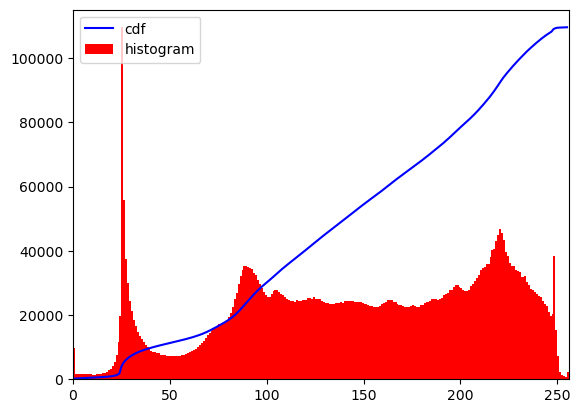

In [90]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [91]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [92]:
img2 = cdf[img]


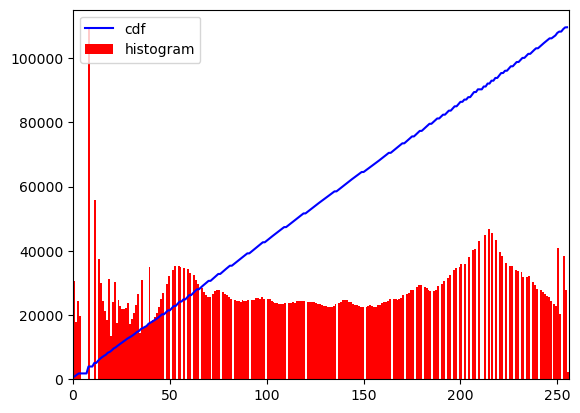

In [93]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

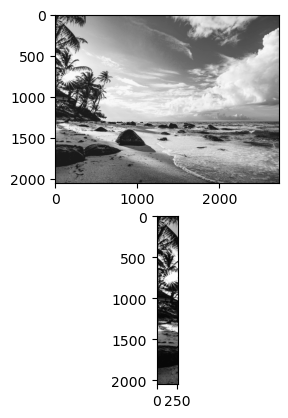

In [94]:
plt.subplot(211), plt.imshow(img, 'gray')
plt.subplot(212), plt.imshow(img2,'gray')
plt.xlim([0,256])
plt.show()

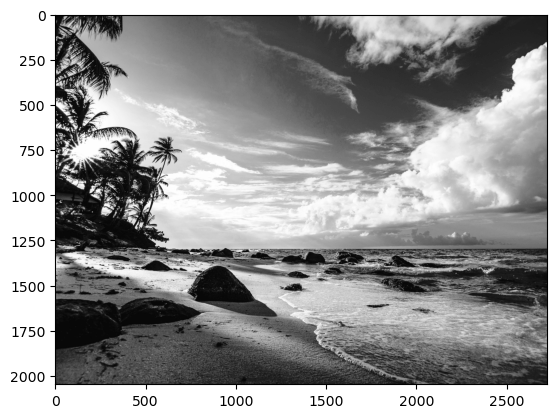

In [95]:
plt.imshow(img2, 'gray')
plt.show()

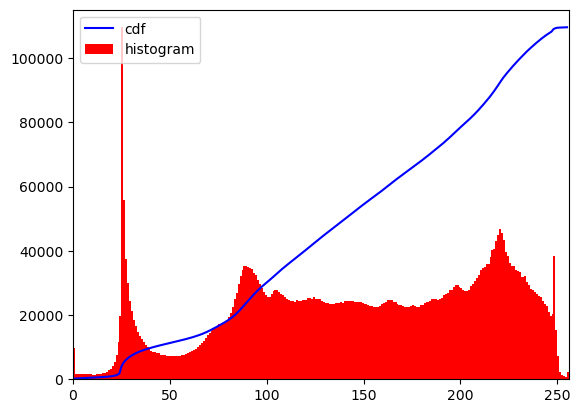

In [96]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

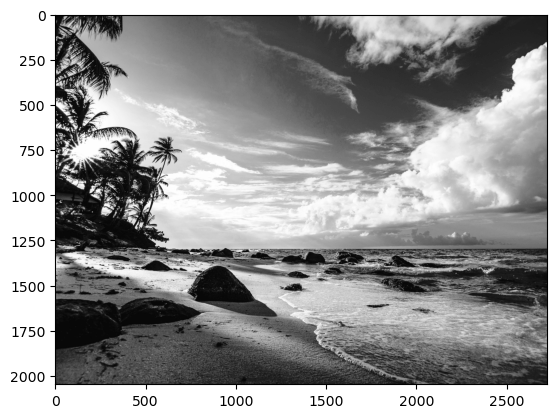

In [97]:
plt.imshow(img2, 'gray')
plt.show()